In [0]:
# import standard libraries

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn import tree

from sklearn.metrics import classification_report
import itertools

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn import preprocessing


In [6]:
# load train data
train_data = pd.read_csv('/content/drive/My Drive/SYDE 522 Project/MoreManipulatedData_bucket_last_col.csv',usecols=lambda x: 'PLAYER_URL' not in x)

# different classes
train_data.BUCKET.unique()

array([' 1-200   ', ' 601+    ', ' 201-600 ', '0'], dtype=object)

In [7]:
# convert string values to numerical data
def convert(data):
    number = preprocessing.LabelEncoder()
    data['POS'] = number.fit_transform(data.POS)
    data['LEAGUE'] = number.fit_transform(data.LEAGUE)
    data['FIRST_JUNIOR_YEAR'] = number.fit_transform(data.FIRST_JUNIOR_YEAR)
    data['DOB'] = number.fit_transform(data.DOB)
    data['NATIONALITY'] = number.fit_transform(data.NATIONALITY)
    data['SHOOTS'] = number.fit_transform(data.SHOOTS)
    data=data.fillna(-999)
    return data

# convert string values in data to numerical classes
train_data=convert(train_data)

# Separating the data and the labels
X = np.asarray(train_data[train_data.columns[:-1]])
y = np.asarray(train_data.BUCKET)

# Splitting the data into the train and the test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(X, y)

train_index, test_index = next(sss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

print('Training data: \n',X)
print('\n')
print('Training labels: \n',y_train)


Training data: 
 [[103143      3     87 ...    180     84      2]
 [106210      1     73 ...    193     95      0]
 [106207      2     21 ...    183     86      0]
 ...
 [249307      1    130 ...    188     98      3]
 [485033      3     59 ...    175     68      2]
 [410552      2      1 ...    183     82      2]]


Training labels: 
 ['0' '0' '0' ... '0' '0' '0']


              precision    recall  f1-score   support

    1-200          0.41      0.36      0.38       408
    201-600        0.27      0.18      0.22       156
    601+           0.49      0.54      0.51       127
           0       0.96      0.97      0.96      6009

    accuracy                           0.91      6700
   macro avg       0.53      0.51      0.52      6700
weighted avg       0.90      0.91      0.90      6700



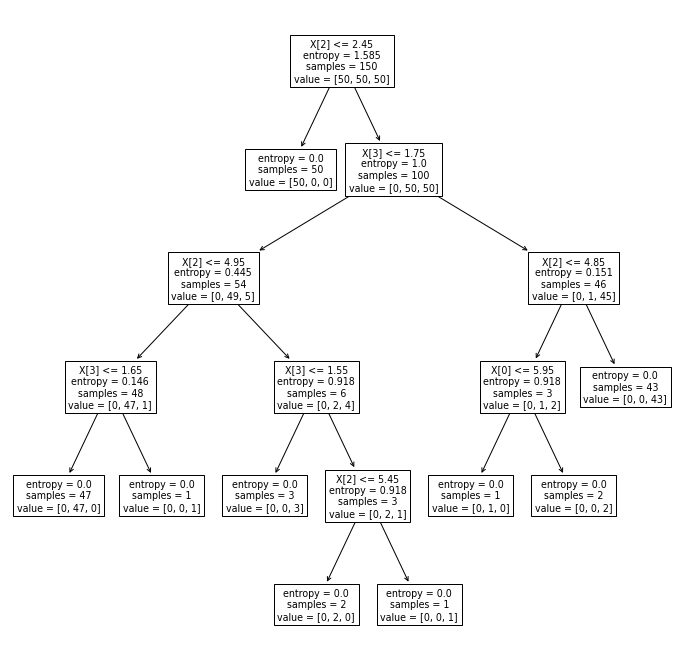

In [4]:
# Decision Tree Classifier (has to be able to deal with floats)
# choose entropy as it provides better accuracy than Gini impurity and 
# choose max depth so there is a stopping position and the tree does not overfit the data
DT = tree.DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=10)

# fit the classifier using the training data
DT = DT.fit(X_train, y_train)

# Predict the test class labels using the trained DT classifier 
y_pred = DT.predict(X_test)

# plot the tree
fig = plt.figure(figsize = (12,12))
iris = load_iris()
tree.plot_tree(DT.fit(iris.data, iris.target)) 

# print accuracy of the classifier
print(classification_report(y_test, y_pred))
